In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('data.csv')

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
dataset.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [6]:
print(dataset.columns.values)

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'Unnamed: 32']


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
dataset.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [10]:
dataset.columns.values

array(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [11]:
for i in range(0,len(dataset.columns.values)):
    print(dataset.iloc[:,i].describe())
    print('-'*40)

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object
----------------------------------------
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64
----------------------------------------
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64
----------------------------------------
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64
----------------------------------------
count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.00

Since we observe that the different features lie in varying limits,hence we use feature scaling and mean normalization.

In [12]:
data = dataset.drop('diagnosis',axis=1)
y = dataset['diagnosis']
data = (data-data.mean())/(data.std())
dataset = pd.concat([y,data],axis=1)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [14]:
for i in dataset.columns.values:
    print(dataset[i].describe())
    print('-'*40)

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object
----------------------------------------
count    5.690000e+02
mean    -3.136331e-15
std      1.000000e+00
min     -2.027864e+00
25%     -6.887793e-01
50%     -2.148925e-01
75%      4.689800e-01
max      3.967796e+00
Name: radius_mean, dtype: float64
----------------------------------------
count    5.690000e+02
mean    -6.558316e-15
std      1.000000e+00
min     -2.227289e+00
25%     -7.253249e-01
50%     -1.045442e-01
75%      5.836621e-01
max      4.647799e+00
Name: texture_mean, dtype: float64
----------------------------------------
count    5.690000e+02
mean    -7.012551e-16
std      1.000000e+00
min     -1.982759e+00
25%     -6.913472e-01
50%     -2.357726e-01
75%      4.992377e-01
max      3.972634e+00
Name: perimeter_mean, dtype: float64
----------------------------------------
count    5.690000e+02
mean    -8.339355e-16
std      1.000000e+00
min     -1.453164e+00
25%     -6.666089e-01
50%  

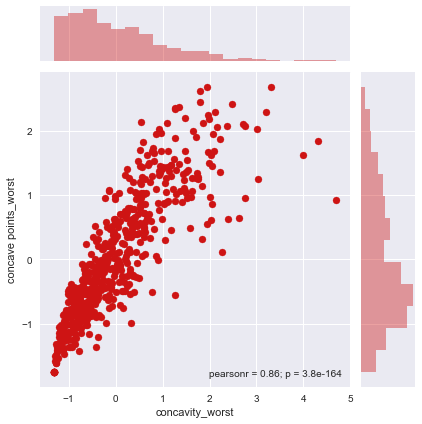

In [15]:
sns.jointplot(dataset['concavity_worst'], dataset['concave points_worst'], color="#ce1414")

plt.close()
sns.set_style("whitegrid")
sns.pairplot(dataset,hue='diagnosis',size=3)
plt.show()

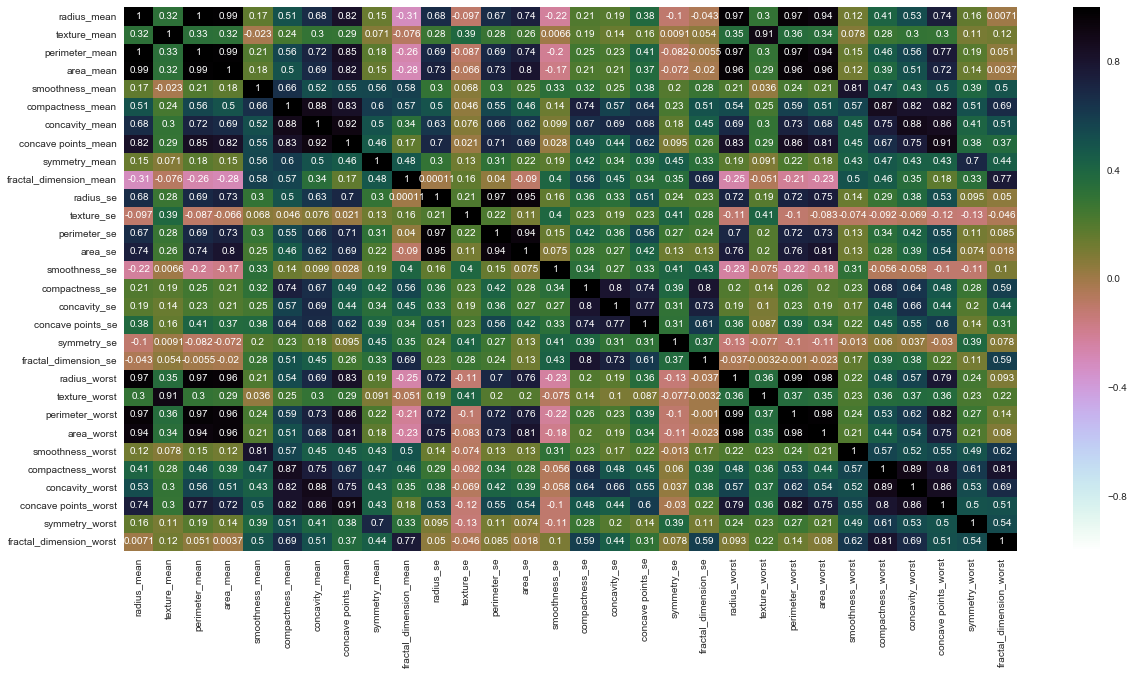

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix_r')
plt.show()

Here we can see that many of the features are closely related to each other and hence we drop the related features. Correlated features in general don't improve models (although it depends on the specifics of the problem like the number of variables and the degree of correlation), but they affect specific models in different ways and to varying extents:

Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interactions.

More generally, this can be viewed as a special case of Occam's razor. A simpler model is preferable, and, in some sense, a model with fewer features is simpler. The concept of minimum description length makes this more precise.

In [17]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',\
              'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',\
              'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
dataset = dataset.drop(drop_list1,axis=1)

In [18]:
dataset.describe()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-6.558316e-15,-8.339355e-16,6.120470e-15,-4.031144e-16,-1.888550e-15,4.860396e-16,-9.782255e-16,-7.423275e-16,-7.449006e-16,1.098906e-15,-3.459447e-16,-3.512129e-18,-5.033661e-15,6.649631e-16,-2.481734e-15,2.424930e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.227289e+00,-1.453164e+00,-3.109349e+00,-1.113893e+00,-2.741705e+00,-1.818265e+00,-1.552898e+00,-7.371804e-01,-1.774504e+00,-1.056571e+00,-1.531542e+00,-1.096004e+00,-2.680337e+00,-1.304683e+00,-2.159060e+00,-1.600431e+00
25%,-7.253249e-01,-6.666089e-01,-7.103378e-01,-7.430941e-01,-7.026215e-01,-7.220040e-01,-6.941984e-01,-4.943192e-01,-6.234697e-01,-5.566714e-01,-6.511078e-01,-5.846041e-01,-6.906227e-01,-7.558491e-01,-6.412994e-01,-6.913035e-01
50%,-1.045442e-01,-2.949274e-01,-3.486040e-02,-3.419391e-01,-7.156354e-02,-1.781226e-01,-1.973239e-01,-3.474770e-01,-2.201415e-01,-1.988904e-01,-2.192375e-01,-2.297383e-01,-4.680159e-02,-2.180402e-01,-1.272975e-01,-2.162538e-01
75%,5.836621e-01,3.631877e-01,6.356397e-01,5.255994e-01,5.303125e-01,4.705693e-01,4.661422e-01,1.066787e-01,3.680315e-01,3.364561e-01,3.553798e-01,2.883884e-01,5.970195e-01,5.306742e-01,4.497425e-01,4.503661e-01
max,4.647799e+00,5.245913e+00,4.766717e+00,4.239858e+00,4.480808e+00,4.906602e+00,6.649429e+00,1.103214e+01,8.022940e+00,1.206207e+01,7.065700e+00,9.842932e+00,3.951897e+00,4.696536e+00,6.040726e+00,6.840837e+00


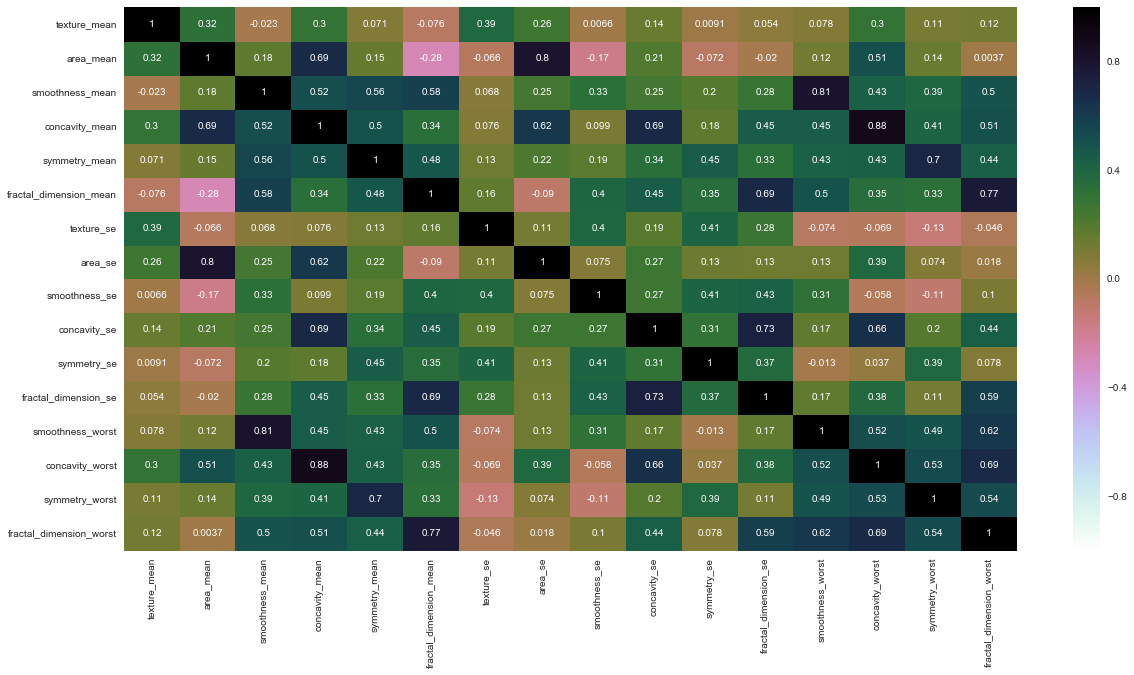

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix_r')
plt.show()

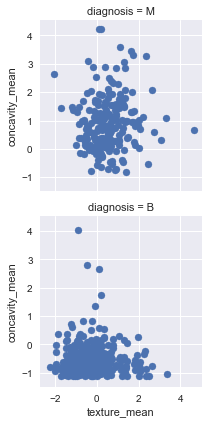

In [20]:
grid = sns.FacetGrid(dataset,row='diagnosis')
grid.map(plt.scatter,'texture_mean','concavity_mean')

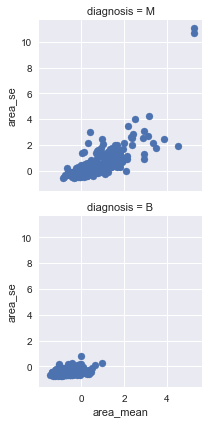

In [21]:
grid = sns.FacetGrid(dataset,row='diagnosis')
grid.map(plt.scatter,'area_mean','area_se')

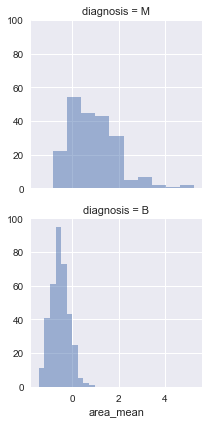

In [22]:
grid = sns.FacetGrid(dataset,row='diagnosis')
grid.map(plt.hist,'area_mean',alpha=0.5)

In [23]:
train,test = train_test_split(dataset,test_size=0.2)
print(train.shape)
print(test.shape)
print(type(train))

(455, 17)
(114, 17)
<class 'pandas.core.frame.DataFrame'>


In [24]:
X_train = train.drop('diagnosis',axis=1)
Y_train = train['diagnosis']
X_test = test.drop('diagnosis',axis=1)
Y_test = test['diagnosis']

In [25]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(455, 16) (455,) (114, 16) (114,)


In [26]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_train,Y_train)

5

In [27]:
logreg = LogisticRegression()
validation_score = cross_val_score(logreg,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
logreg.fit(X_train,Y_train)
acc_test = round(logreg.score(X_test,Y_test)*100,2)
print('Accuracy of Logistic Regression is {}'.format(acc_test))

The validation score Using kfolds is  [0.97802198 0.98901099 0.97802198 0.96703297 0.93406593]
Accuracy of Logistic Regression is 98.25


In [28]:
SVM = SVC()
validation_score = cross_val_score(SVM,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
SVM.fit(X_train,Y_train)
acc_test = round(SVM.score(X_test,Y_test)*100,2)
print('Accuracy of Support Vector Machines is {}'.format(acc_test))

The validation score Using kfolds is  [0.97802198 0.97802198 0.94505495 0.96703297 0.95604396]
Accuracy of Support Vector Machines is 94.74


In [29]:
decision_tree = DecisionTreeClassifier()
validation_score = cross_val_score(decision_tree,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
decision_tree.fit(X_train,Y_train)
acc_test = round(decision_tree.score(X_test,Y_test)*100,2)
print('Accuracy of Decision Trees is {}'.format(acc_test))

The validation score Using kfolds is  [0.87912088 0.9010989  0.92307692 0.93406593 0.9010989 ]
Accuracy of Decision Trees is 94.74


In [30]:
random_forest = RandomForestClassifier()
validation_score = cross_val_score(random_forest,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
random_forest.fit(X_train,Y_train)
acc_test = round(random_forest.score(X_test,Y_test)*100,2)
print('Accuracy of Random Forest is {}'.format(acc_test))

The validation score Using kfolds is  [0.96703297 0.93406593 0.95604396 0.97802198 0.94505495]
Accuracy of Random Forest is 95.61


In [31]:
knn = KNeighborsClassifier()
validation_score = cross_val_score(knn,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
knn.fit(X_train,Y_train)
acc_test = round(knn.score(X_test,Y_test)*100,2)
print('Accuracy of K Neighbors Classifier is {}'.format(acc_test))

The validation score Using kfolds is  [0.97802198 0.94505495 0.94505495 0.91208791 0.93406593]
Accuracy of K Neighbors Classifier is 95.61


In [32]:
perceptron_classifier = Perceptron()
validation_score = cross_val_score(perceptron_classifier,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
perceptron_classifier.fit(X_train,Y_train)
acc_test = round(perceptron_classifier.score(X_test,Y_test)*100,2)
print('Accuracy of Perceptron is {}'.format(acc_test))

The validation score Using kfolds is  [0.91208791 0.96703297 0.97802198 0.96703297 0.92307692]
Accuracy of Perceptron is 97.37
